In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

from PIL import Image
from IPython.display import display, HTML
from pathlib import Path

In [3]:
df = pd.read_csv('../datasets/morph2/CD2/MORPH_Album2_comp with height and weight.csv')
df.head()

,Filename,id_num,picture_num,dob,doa,weight,height,race,gender,facial_hair,age,age_diff,glasses,photo,photo_quality,rec_location
0,208891_00M26.JPG,208891,0,1/22/79,7/22/05,210.0,71.0,B,M,NaN,26,0,NaN,Album2/208891_00M26.JPG,GOOD,cmpd
1,208891_01M28.JPG,208891,1,1/22/79,2/25/07,220.0,71.0,B,M,NaN,28,583,NaN,Album2/208891_01M28.JPG,GOOD,cmpd
2,208891_02M28.JPG,208891,2,1/22/79,3/27/07,170.0,71.0,B,M,NaN,28,30,NaN,Album2/208891_02M28.JPG,GOOD,cmpd
3,208920_00M27.JPG,208920,0,5/10/79,9/11/06,150.0,74.0,W,M,NaN,27,0,NaN,Album2/208920_00M27.JPG,GOOD,cmpd
4,208920_01M28.JPG,208920,1,5/10/79,12/3/07,150.0,74.0,W,M,NaN,28,448,NaN,Album2/208920_01M28.JPG,GOOD,cmpd


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55608 entries, 0 to 55607
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Filename       55608 non-null  object 
 1   id_num         55608 non-null  int64  
 2   picture_num    55608 non-null  int64  
 3   dob            55608 non-null  object 
 4   doa            55608 non-null  object 
 5   weight         39537 non-null  float64
 6   height         39537 non-null  float64
 7   race           55608 non-null  object 
 8   gender         55608 non-null  object 
 9   facial_hair    0 non-null      float64
 10  age            55608 non-null  int64  
 11  age_diff       55608 non-null  int64  
 12  glasses        0 non-null      float64
 13  photo          55608 non-null  object 
 14  photo_quality  55608 non-null  object 
 15  rec_location   55608 non-null  object 
dtypes: float64(4), int64(4), object(8)
memory usage: 6.8+ MB


<AxesSubplot:>

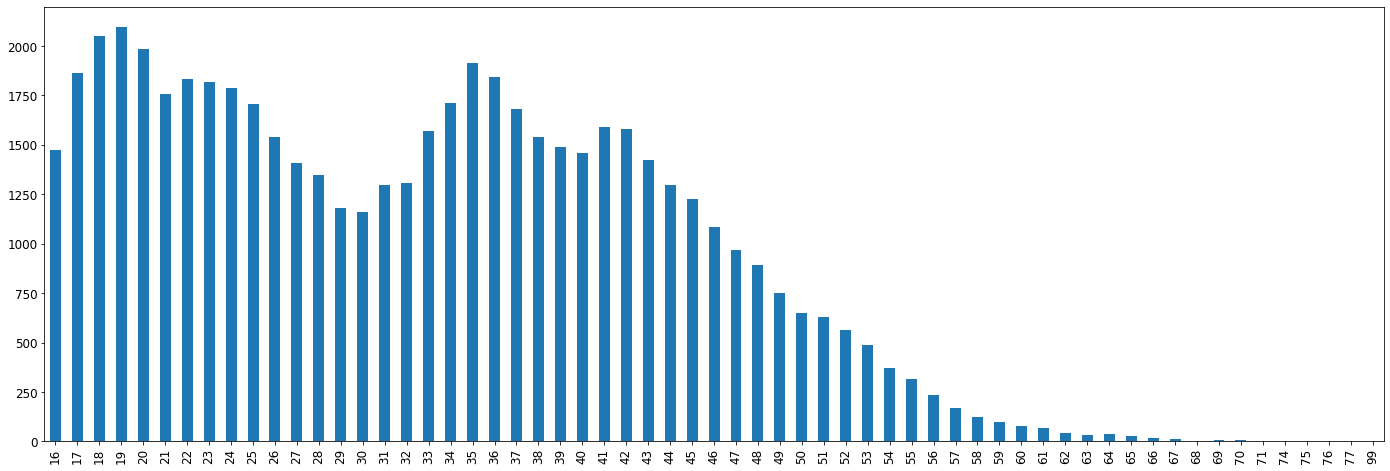

In [5]:
df['age'].value_counts().sort_index().plot(kind='bar', fontsize=12, figsize=(24,8))

In [6]:
total_cnt, minor_cnt = 0, 0

for age, count in df['age'].value_counts().items():
    if age < 18:
        minor_cnt += count
    total_cnt += count
    
minor_p = minor_cnt/total_cnt

print(f'Percentile of minors on extracted annotation: \t {minor_p * 100 : .2f}%')

Percentile of minors on extracted annotation: 	  6.00%


In [77]:
samples = df.sample(n=18)

In [78]:
samples

,Filename,id_num,picture_num,dob,doa,weight,height,race,gender,facial_hair,age,age_diff,glasses,photo,photo_quality,rec_location
8757,118151_11M33.JPG,118151,11,2/25/72,7/11/05,NaN,NaN,B,M,NaN,33,67,NaN,Album2/118151_11M33.JPG,GOOD,cmpd
3426,324159_00M16.JPG,324159,0,12/5/89,1/11/06,125.0,67.0,B,M,NaN,16,0,NaN,Album2/324159_00M16.JPG,GOOD,cmpd
20850,315549_00M17.JPG,315549,0,6/10/88,7/7/05,165.0,73.0,B,M,NaN,17,0,NaN,Album2/315549_00M17.JPG,GOOD,cmpd
16675,332418_03F24.JPG,332418,3,5/8/82,2/9/07,130.0,66.0,W,F,NaN,24,58,NaN,Album2/332418_03F24.JPG,GOOD,cmpd
7464,325208_00M52.JPG,325208,0,7/9/53,2/8/06,175.0,73.0,B,M,NaN,52,0,NaN,Album2/325208_00M52.JPG,GOOD,cmpd
9027,300327_02F36.JPG,300327,2,8/5/70,11/10/06,160.0,66.0,B,F,NaN,36,60,NaN,Album2/300327_02F36.JPG,GOOD,cmpd
26479,196393_01M32.JPG,196393,1,11/9/73,11/30/05,174.0,73.0,B,M,NaN,32,89,NaN,Album2/196393_01M32.JPG,GOOD,cmpd
35331,297066_03M21.JPG,297066,3,9/28/84,12/14/05,160.0,68.0,H,M,NaN,21,51,NaN,Album2/297066_03M21.JPG,GOOD,cmpd
51178,273458_12M45.JPG,273458,12,2/22/62,4/13/07,NaN,NaN,B,M,NaN,45,182,NaN,Album2/273458_12M45.JPG,GOOD,cmpd
5429,277620_04F20.JPG,277620,4,11/13/85,10/19/06,125.0,67.0,B,F,NaN,20,23,NaN,Album2/277620_04F20.JPG,GOOD,cmpd


In [63]:
def display_image_grid(df, n_cols=2):
    """
    Displays a grid of images in a Jupyter Notebook.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing image paths.
    n_cols (int): Number of columns in the grid.
    """
    n_images = len(df)
    html = "<table>"

    for i, row in enumerate(df.iterrows(), 0):
        if i % n_cols == 0:
            if i != 0:
                html += "</tr>"
            html += "<tr>"
        idx, data = row
        image_path = f'../datasets/morph2/CD2/{data["photo"]}'
        image = Image.open(image_path)
        #display(image)
        #image.show()  # Show the image in a Jupyter Notebook cell
        html += f"<td><img src='{image_path}' style='width: 125px;'></td>"

    html += "</tr></table>"
    display(HTML(html))

In [64]:
# Display the image grid
display_image_grid(samples, n_cols=3)

,,
,,
,,
,,


In [65]:
def display_image_grid(df, n_images):
    """
    Displays a grid of images in a Jupyter Notebook.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing image paths.
    n_cols (int): Number of columns in the grid.
    """
    n_cols = int(math.sqrt(n_images))
    n_rows = int(math.sqrt(n_images))
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3))
    axes = axes.flatten()
    
    for ax, image_path in zip(axes, df['photo']):
        image = Image.open(f'../datasets/morph2/CD2/{image_path}')
        ax.imshow(image)
        ax.axis('off')
        ax.set_xticks([])  # Remove x-ticks
        ax.set_yticks([])  # Remove y-ticks
        ax.set_xticklabels([])  # Remove x-tick labels
        ax.set_yticklabels([])  # Remove y-tick labels
    
    
    plt.tight_layout()
    # Remove padding between images
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

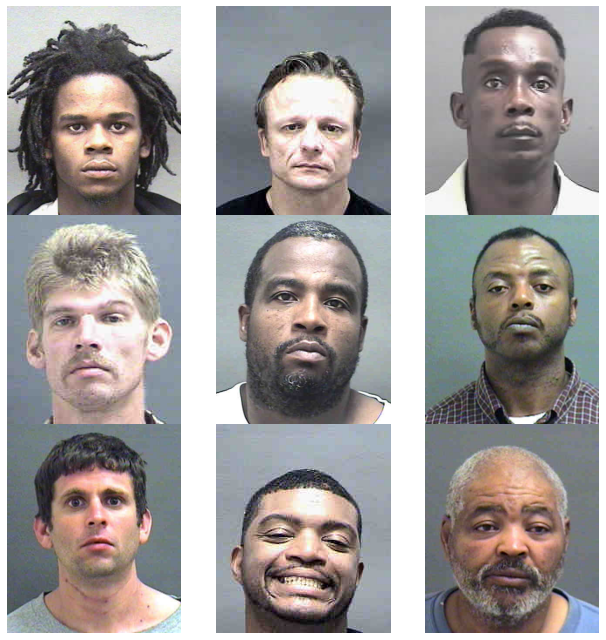

In [66]:
display_image_grid(samples, n_images=9)

In [80]:
def display_image_grid(df, n_rows, n_cols):
    """
    Displays a grid of images in a Jupyter Notebook using ImageGrid.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing image paths.
    n_cols (int): Number of columns in the grid.
    """
    fig = plt.figure(figsize=(n_cols * 3, n_rows * 3))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(n_rows, n_cols),  # create grid of axes
                     axes_pad=0.0,  # pad between axes in inches
                     )

    img_size=(300, 325)
    
    for ax, image_path in zip(grid, df['photo']):
        image = Image.open(f'../datasets/morph2/CD2/{image_path}')
        image = image.resize(img_size, Image.ANTIALIAS)  # Resize image
        ax.imshow(image)
        ax.axis('off')  # Turn off axis
    
    plt.show()

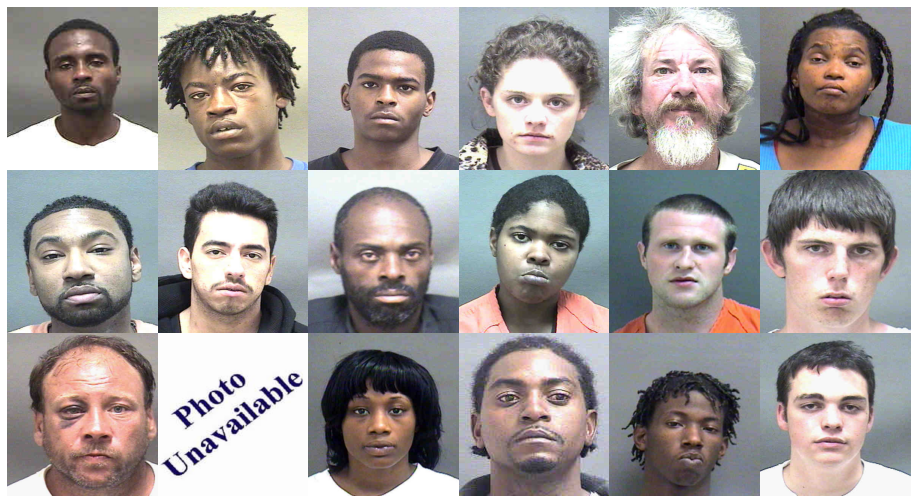

In [81]:
display_image_grid(samples, n_rows=3, n_cols=6)